# Regularização - Lasso e Ridgeston

links
+ (medium - turing talks)[https://medium.com/turing-talks/turing-talks-20-regress%C3%A3o-de-ridge-e-lasso-a0fc467b5629]

Conceitos anterioires

+ **bias** O primeiro fator, chamado de bias (viés), é a diferença entre a predição média do nosso modelo e o valor correto esperado. Sendo assim, um modelo com bias aprende relações erradas e gera previsões longe do esperado. O modelo não aprende corretamente com o dataset, assumindo muitas informações sobre os dados que não são necessariamente corretas. Dessa forma, modelos com alto bias possuem um problema de underfitting.

**O que é regularização**:
 + regularização é a inserção de bias em um modelo. Ou em outras palavras, essa técnica **desencoraja o ajuste excessivo dos dados, afim de diminuir a sua variância**. Dentro da regressão linear, Ridge e Lasso são formas de regularizarmos a nossa função através de penalidades. De forma simples, dentro de uma equação estatística dos dados, nós **alteramos os fatores de forma a priorizar ou não certas parcelas da equação** e, assim, evitamos ‘overfitting’ e melhoramos a qualidade de predição.
 
 + Regularization is intended to tackle the problem of overfitting. Overfitting becomes a clear menace when there is a large dataset with thousands of features and records. Ridge regression and Lasso regression are two popular techniques that make use of regularization for predicting.

+ Both the techniques work by penalising the magnitude of coefficients of features along with minimizing the error between predictions and actual values or records. The key difference however, between Ridge and Lasso regression is that Lasso Regression has the ability to nullify the impact of an irrelevant feature in the data, meaning that it can reduce the coefficient of a feature to zero thus completely eliminating it and hence is better at reducing the variance when the data consists of many insignificant features. Ridge regression, however, can not reduce the coefficients to absolute zero. Ridge regression performs better when the data consists of features which are sure to be more relevant and useful.

### LASSO

The LASSO (Least Absolute Shrinkage and Selection Operator) is a regression method that involves penalizing the absolute size of the regression coefficients.

By penalizing or constraining the sum of the absolute values of the estimates you make some of your coefficients zero. The larger the penalty applied, the further estimates are shrunk towards zero. This is convenient when we want some automatic feature/variable selection, or when dealing with highly correlated predictors, where standard regression will usually have regression coefficients that are too large.

----



In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
file_path = "../files/"

In [2]:
base = pd.read_csv(file_path + 'house-prices.csv')
base.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# PréProcessamento: Dividindo em X e Y
X = base.iloc[:, 3:19].values
y = base.iloc[:, 2].values

# Dividindo a base
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3,random_state = 0)

## Regressão Linear Múltipla

In [18]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_treinamento, y_treinamento)
previsoes = regressor.predict(X_teste)
score = regressor.score(X_treinamento, y_treinamento)
print("Score do Treinamento =", score)

score_test = regressor.score(X_teste, y_teste)
print("Score do Teste =", score_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_teste, previsoes)
print("MAE - MeanAbsoluteError ==>", mae)
mse = mean_squared_error(y_teste, previsoes)
print("MSE - MeanSquareError   ==>", mse)
mae = mean_absolute_error(y_teste, previsoes)

Score do Treinamento = 0.7029888085955005
Score do Teste = 0.6885414149062228
MAE - MeanAbsoluteError ==> 123888.44377484432
MSE - MeanSquareError   ==> 42760757001.54226


In [4]:
from sklearn.linear_model import Lasso

#Initializing the Lasso Regressor with Normalization Factor as True
lasso_reg = Lasso(normalize=True)

#Fitting the Training data to the Lasso regressor
lasso_reg.fit(x_train,y_train)

#Predicting for X_test
y_pred = lasso_reg.predict(x_test)

##########

score = lasso_reg.score(x_train, y_train)
print("Score do Treinamento =", score)

score_test = lasso_reg.score(x_test, y_test)
print("Score do Teste =", score_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
print("MAE - MeanAbsoluteError ==>", mae)
mse = mean_squared_error(y_test, y_pred)
print("MSE - MeanSquareError   ==>", mse)
mae = mean_absolute_error(y_test, y_pred)

Score do Treinamento = 0.702986714680133
Score do Teste = 0.6884658380037422
MAE - MeanAbsoluteError ==> 123841.18918197608
MSE - MeanSquareError   ==> 42771133101.982475


In [28]:
from sklearn.linear_model import Lasso

#Initializing the Lasso Regressor with Normalization Factor as True
lasso_reg = Lasso(normalize=True, alpha=0.5, max_iter=5000)

#Fitting the Training data to the Lasso regressor
lasso_reg.fit(x_train,y_train)

#Predicting for X_test
y_pred = lasso_reg.predict(x_test)

##########

score = lasso_reg.score(x_train, y_train)
print("Score do Treinamento =", score)

score_test = lasso_reg.score(x_test, y_test)
print("Score do Teste =", score_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
print("MAE - MeanAbsoluteError ==>", mae)
mse = mean_squared_error(y_test, y_pred)
print("MSE - MeanSquareError   ==>", mse)
mae = mean_absolute_error(y_test, y_pred)

Score do Treinamento = 0.7029882848719095
Score do Teste = 0.6885040550733263
MAE - MeanAbsoluteError ==> 123864.70370957833
MSE - MeanSquareError   ==> 42765886205.91344


### Lasso coeficientes: `features selections`

[-3.05028202e+04  3.63422142e+04  1.54704180e+02  4.85840763e-03
  9.32361178e+03  5.84716485e+05  5.60286430e+04  2.53259723e+04
  1.01115007e+05  2.69564880e+01  0.00000000e+00 -2.59848246e+03
  1.38774887e+01 -5.46695399e+02  6.10716198e+05 -1.93492164e+05]


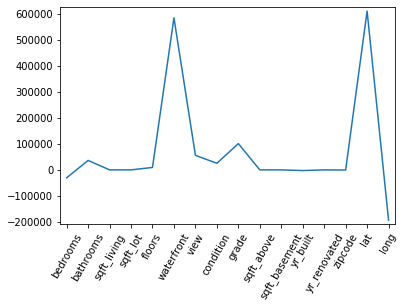

In [11]:
# Store the column/feature names into a list "colnames"
colnames = list(base.columns)[3:19]

# Compute and print the coefficients
lasso_coef = lasso_reg.coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(colnames)), lasso_coef)
plt.xticks(range(len(colnames)), colnames, rotation=60) 
plt.margins(0.02)
plt.show()

### HyperTuning Lasso

In [13]:
# Parâmetros do SVC - C-Support Vector Classification
lasso_reg_tuning = Lasso()
lasso_reg_tuning.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [22]:
# Valores Default
lasso_reg_tuning.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [25]:
hyper_parameters = {
    'normalize': [True],
    'alpha': [0.1, 0.5, 0.9],
    'max_iter': [1000, 5000, 10000]
}

In [26]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator = lasso_reg_tuning,
                           param_grid = hyper_parameters,
                           scoring = 'neg_median_absolute_error',
                           cv = 5,
                           n_jobs = -1)

grid_search = grid_search.fit(x_train, y_train)

print("score", grid_search.best_score_)
print("best hyperParams\n", grid_search.best_params_)

score -88425.30062530702
best hyperParams
 {'alpha': 0.5, 'max_iter': 5000, 'normalize': True}


In [18]:
import sklearn

sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])